In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

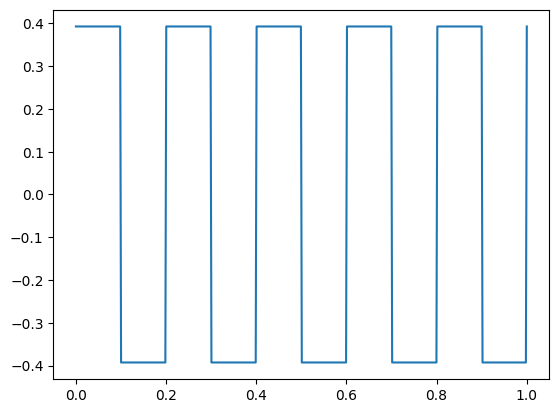

In [2]:
time_series = np.linspace(0, 1, 500)
phi = np.pi/8*signal.square(2 * np.pi * 5 * time_series)
plt.plot(time_series, phi)

In [3]:
def trajectory_gen_1(phi, v, L):
    R = L / np.tan(phi)

    omega = v / R

    theta = omega * time_series # dependencies: omega

    x_ref = R * np.cos(theta) # dependencies: R,  theta
    y_ref = R * np.sin(theta) # dependencies: R,  theta
    theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    # theta_ref
    x_initial = -3
    y_initial = 3

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, x_ref, theta_ref

def trajectory_gen(x_initial=-3, y_initial=3):
    x_ref = np.linspace(0, 10, 200)
    y_ref = 2*np.sin(2 * np.pi * x_ref * 0.2)

    theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, y_ref, theta_ref

x_ref, y_ref, theta_ref = trajectory_gen()

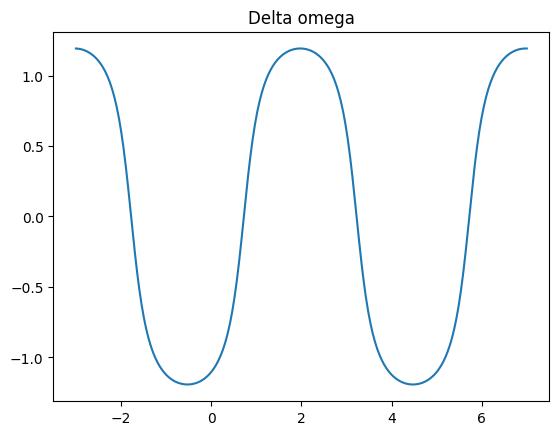

In [4]:
plt.title("Delta omega")
plt.plot(x_ref, theta_ref)

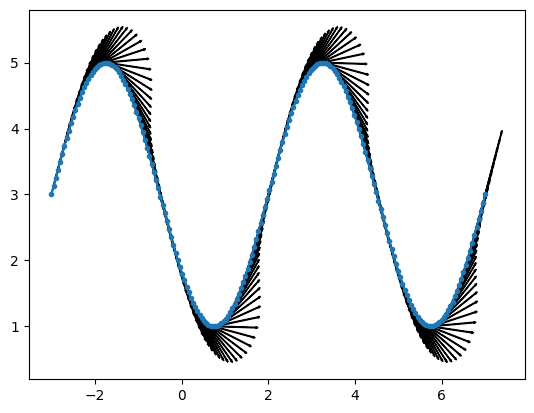

In [5]:
plt.plot(x_ref, y_ref, ".-")

for i, (x, y) in enumerate(zip(x_ref, y_ref)):
    if i >= len(theta_ref):
        break

    plt.arrow(x, y, np.cos(theta_ref[i]), np.sin(theta_ref[i]), width=0.01)

In [6]:
theta_ref

array([ 1.19188414,  1.19050943,  1.18773695,  1.18351965,  1.17778482,
        1.17043119,  1.16132503,  1.15029463,  1.13712313,  1.12153901,
        1.10320372,  1.0816958 ,  1.05649038,  1.02693341,  0.99220967,
        0.95130508,  0.90296584,  0.84566288,  0.77758167,  0.69667896,
        0.6008811 ,  0.48853109,  0.35917021,  0.21455793,  0.05942969,
       -0.09882678, -0.25193497, -0.39305642, -0.51822523, -0.62633084,
       -0.71822264, -0.79572145, -0.86092351, -0.91582633, -0.96217478,
       -1.00142667, -1.0347721 , -1.06317166, -1.08739693, -1.10806692,
       -1.12567846, -1.14063055, -1.15324363, -1.16377455, -1.17242807,
       -1.17936581, -1.18471294, -1.18856326, -1.19098285, -1.19201263,
       -1.19166984, -1.18994877, -1.18682046, -1.18223165, -1.1761028 ,
       -1.16832496, -1.15875546, -1.14721207, -1.13346526, -1.11722802,
       -1.09814273, -1.0757642 , -1.04953792, -1.01877276, -0.98260755,
       -0.93997208, -0.88954656, -0.82972982, -0.75864086, -0.67

In [7]:
class Test:
    def __init__(self) -> None:
        self.huy = 0

a = Test()
hasattr(a, "huy")

True

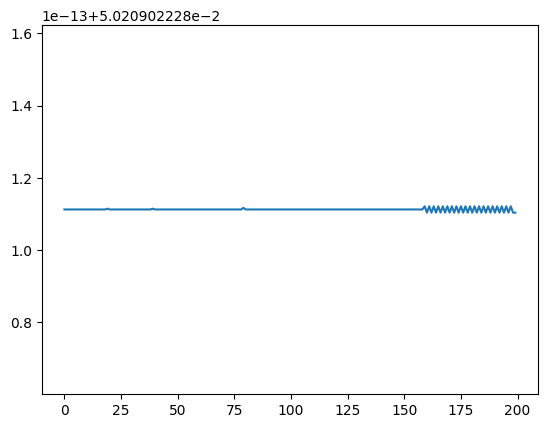

In [8]:
theta_ref = np.arctan(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
theta_ref = np.append(theta_ref, theta_ref[-1])

# plt.subplot(221)
plt.plot(theta_ref)
# plt.subplot(222)
# plt.plot(time_series, theta)

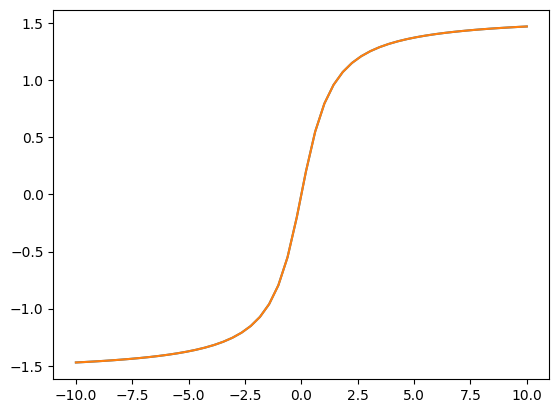

In [9]:

x = np.linspace(-10, 10, 50)
x
plt.plot(x, np.arctan(x))
plt.plot(x, np.arctan2(x, 1))